In [1]:
from chebGreen.chebpy2 import Chebfun2, Chebpy2Preferences
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def green(x,s):
    g = 0
    g = (x <= s) * (x * (1-s)) + (x > s) * (s * (1-x))
    return g

In [3]:
cheb2prefs = Chebpy2Preferences()
cheb2prefs.prefx.eps = 1e-6
cheb2prefs.prefx.eps = 1e-6

In [4]:
%%time
g = Chebfun2(green, domain = [0, 1, 0, 1], prefs = cheb2prefs)

CPU times: user 7.67 s, sys: 3.79 s, total: 11.5 s
Wall time: 11.5 s


In [5]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

In [6]:
%%time
G = g[x,y]

CPU times: user 6.55 s, sys: 1.61 s, total: 8.15 s
Wall time: 5.52 s


In [7]:
%%time
u,s,v = g.svd()

CPU times: user 35.6 s, sys: 12.5 s, total: 48.1 s
Wall time: 40.2 s


1.008179142004614


(0.0, 1.0)

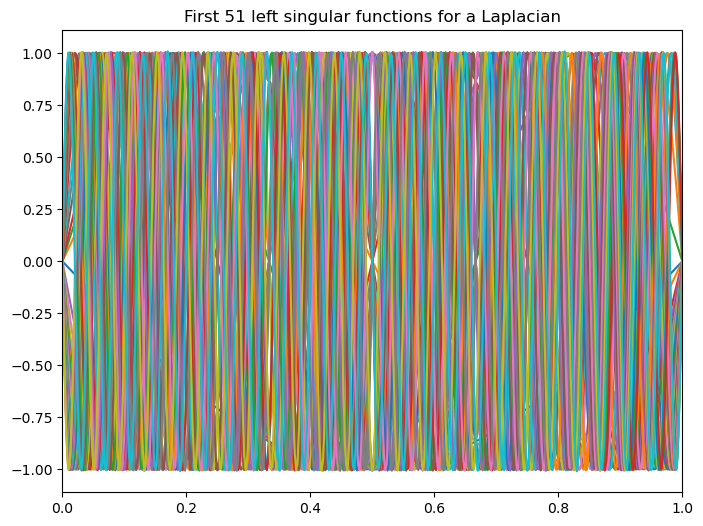

In [8]:
i = 50
fig = plt.figure(figsize = (8,6))
u[:,:i].plot()
print(np.max(u[:,:i].vscale))
plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [9]:
Gtheory = green(x,y)
np.linalg.norm(G-Gtheory)/np.linalg.norm(Gtheory)

9.642534462399506e-05

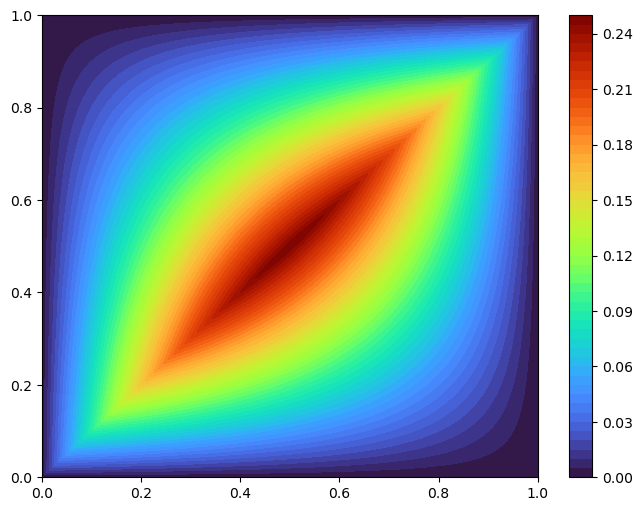

In [10]:
fig = plt.figure(figsize = (8,6))
plt.contourf(x, y, G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

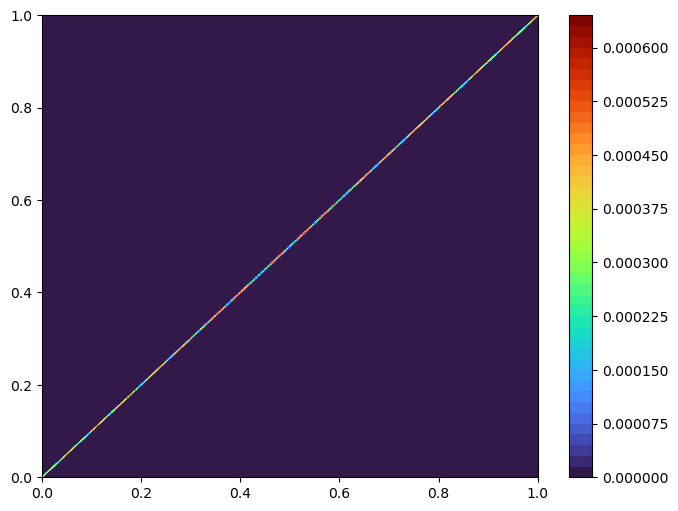

In [12]:
error = np.abs(G-Gtheory)
fig = plt.figure(figsize = (8,6))
plt.contourf(x, y, error, 50, cmap = 'turbo', vmin = np.min(error), vmax = np.max(error))
plt.colorbar()